# Import the package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# Datasets

In [2]:
CTGData=pd.read_csv('CTG.csv')
CTGData.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


In [3]:
CTGData1=CTGData.copy()

In [4]:
CTGData1['CLASS']=CTGData1['CLASS'].replace([1], 'A')
CTGData1['CLASS']=CTGData1['CLASS'].replace([2], 'B')
CTGData1['CLASS']=CTGData1['CLASS'].replace([3], 'C')
CTGData1['CLASS']=CTGData1['CLASS'].replace([4], 'D')
CTGData1['CLASS']=CTGData1['CLASS'].replace([5], 'SH')
CTGData1['CLASS']=CTGData1['CLASS'].replace([6], 'AD')
CTGData1['CLASS']=CTGData1['CLASS'].replace([7], 'DE')
CTGData1['CLASS']=CTGData1['CLASS'].replace([8], 'LD')
CTGData1['CLASS']=CTGData1['CLASS'].replace([9], 'FS')
CTGData1['CLASS']=CTGData1['CLASS'].replace([10], 'SUSP')
print(CTGData1['CLASS'])

0       FS
1       AD
2       AD
3       AD
4        B
        ..
2121    SH
2122    SH
2123    SH
2124    SH
2125     A
Name: CLASS, Length: 2126, dtype: object


<AxesSubplot:xlabel='CLASS', ylabel='count'>

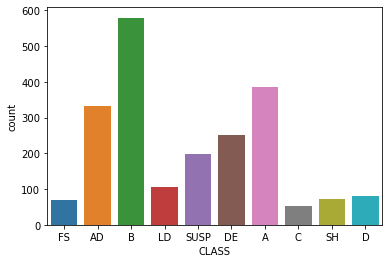

In [5]:
sns.countplot(x='CLASS',data=CTGData1)

In [6]:
CTGData1['NSP']=CTGData1['NSP'].replace([1], 'Normal')
CTGData1['NSP']=CTGData1['NSP'].replace([2], 'Suspect')
CTGData1['NSP']=CTGData1['NSP'].replace([3], 'Pathologic')

<AxesSubplot:xlabel='NSP', ylabel='count'>

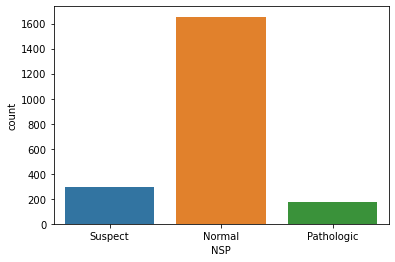

In [7]:
sns.countplot(x='NSP',data=CTGData1)

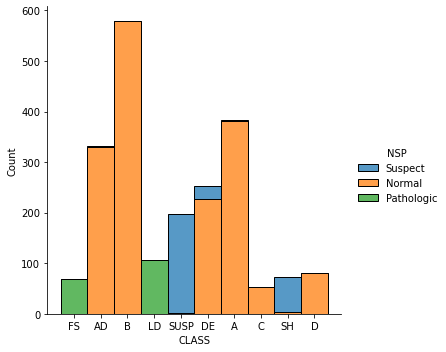

In [8]:
sns.displot(CTGData1, x="CLASS", hue="NSP", multiple="stack")

In [9]:
CTGData2=CTGData.copy()

In [10]:
x=CTGData2.iloc[:,21:-1]
enc=OneHotEncoder(categories='auto').fit(x)
result=enc.transform(x).toarray()

result
# 1 step ok
# OneHotEncoder(categories='auto').fit_transform(x).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
result.shape

(2126, 10)

recovery

In [12]:
pd.DataFrame(enc.inverse_transform(result))

,0
0,9
1,6
2,6
3,6
4,2
...,...
2121,5
2122,5
2123,5
2124,5


In [13]:
newdata=pd.concat([CTGData2,pd.DataFrame(result)],axis=1)
newdata.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,0,1,2,3,4,5,6,7,8,9
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
newdata.drop(['CLASS'],axis=1,inplace=True)

In [15]:
newdata.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,0,1,2,3,4,5,6,7,8,9
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
newdata.columns

Index([      'LB',       'AC',       'FM',       'UC',       'DL',       'DS',
             'DP',     'ASTV',     'MSTV',     'ALTV',     'MLTV',    'Width',
            'Min',      'Max',     'Nmax',   'Nzeros',     'Mode',     'Mean',
         'Median', 'Variance', 'Tendency',      'NSP',          0,          1,
                2,          3,          4,          5,          6,          7,
                8,          9],
      dtype='object')

In [17]:
enc=OneHotEncoder(sparse=False)
result1=enc.fit_transform(newdata[['NSP']])
result1

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [18]:
result1.shape

(2126, 3)

In [19]:
pd.DataFrame(enc.inverse_transform(result1))

,0
0,2
1,1
2,1
3,1
4,1
...,...
2121,2
2122,2
2123,2
2124,2


In [20]:
newdata=pd.concat([newdata,pd.DataFrame(result1)],axis=1)
newdata.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,3,4,5,6,7,8,9,0,1,2
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
newdata.drop(['NSP'],axis=1,inplace=True)

In [22]:
newdata.columns= ['LB',       'AC',       'FM',       'UC',       'DL',       'DS',
             'DP',     'ASTV',     'MSTV',     'ALTV',     'MLTV',    'Width',
            'Min',      'Max',     'Nmax',   'Nzeros',     'Mode',     'Mean',
         'Median', 'Variance', 'Tendency',      'A',          'B',
                'C',          'D',          'SH',          'AD',          'DE',          'LD',
                'FS',          'SUSP','Normal','Suspect','Pathologic']

In [23]:
newdata.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'SH', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'Normal', 'Suspect', 'Pathologic'],
      dtype='object')

In [24]:
npcorr=np.corrcoef(newdata)
npcorr

array([[1.        , 0.91074002, 0.91001782, ..., 0.95465556, 0.95603397,
        0.94596671],
       [0.91074002, 1.        , 0.99991895, ..., 0.94988057, 0.94818799,
        0.92080836],
       [0.91001782, 0.99991895, 1.        , ..., 0.94863527, 0.94696983,
        0.91960395],
       ...,
       [0.95465556, 0.94988057, 0.94863527, ..., 1.        , 0.9997529 ,
        0.9939146 ],
       [0.95603397, 0.94818799, 0.94696983, ..., 0.9997529 , 1.        ,
        0.99509925],
       [0.94596671, 0.92080836, 0.91960395, ..., 0.9939146 , 0.99509925,
        1.        ]])

In [25]:
pdcorr=newdata.corr()
pdcorr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,D,SH,AD,DE,LD,FS,SUSP,Normal,Suspect,Pathologic
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,...,0.005591,0.158350,-0.130368,-0.030849,-0.122136,0.069885,0.283783,-0.251875,0.341922,-0.049357
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,...,0.427501,-0.124853,0.231766,-0.269259,-0.150014,-0.150440,-0.253091,0.394988,-0.302513,-0.215765
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,...,0.061082,-0.026399,0.102752,-0.007396,0.099733,0.039000,-0.035248,-0.060913,-0.009890,0.104208
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,...,0.001433,-0.050414,0.188738,0.158570,0.115927,-0.231245,-0.290223,0.263823,-0.271709,-0.056735
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,...,-0.111726,-0.109793,0.373723,0.536796,0.327327,-0.115799,-0.186946,0.030166,-0.183887,0.185230
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,...,-0.011341,-0.010669,-0.006172,-0.020896,0.217070,-0.010436,-0.018210,-0.090782,-0.022872,0.165509
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,...,-0.053767,-0.050580,-0.007688,0.055766,0.719845,0.005485,-0.086334,-0.340895,-0.048535,0.574644
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,...,-0.113669,0.072269,-0.198840,-0.132195,0.137192,0.308643,0.364282,-0.493391,0.348213,0.306735
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,...,0.096120,-0.126216,0.284401,0.259776,0.275303,-0.210904,-0.329125,0.207717,-0.315373,0.082600
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,...,-0.106547,0.075927,-0.205648,-0.117518,-0.123011,0.478205,0.446388,-0.489400,0.418659,0.212343


In [26]:
pdspmcorr=newdata.corr(method='spearman')
pdspmcorr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,D,SH,AD,DE,LD,FS,SUSP,Normal,Suspect,Pathologic
LB,1.000000,-0.113015,-0.020977,-0.132727,-0.174036,-0.059776,-0.141051,0.317172,-0.367277,0.340119,...,-0.005759,0.166074,-0.124980,-0.036951,-0.124785,0.064877,0.287068,-0.251752,0.345724,-0.054311
AC,-0.113015,1.000000,0.049472,0.117412,-0.011688,-0.051046,-0.118342,-0.345546,0.327437,-0.491562,...,0.313063,-0.123780,0.332701,-0.300741,-0.161855,-0.191459,-0.310727,0.461557,-0.353969,-0.251538
FM,-0.020977,0.049472,1.000000,-0.313305,0.032419,0.001646,0.122029,0.259646,0.070506,-0.075470,...,0.137828,-0.012714,0.027578,-0.038045,0.048728,0.050564,0.095269,-0.113388,0.079478,0.071177
UC,-0.132727,0.117412,-0.313305,1.000000,0.303466,0.006955,0.131251,-0.214211,0.325295,-0.284046,...,-0.008871,-0.046654,0.181447,0.170019,0.098771,-0.229882,-0.289005,0.269715,-0.268636,-0.069470
DL,-0.174036,-0.011688,0.032419,0.303466,1.000000,0.062811,0.330248,-0.153721,0.618334,-0.385865,...,-0.123045,-0.121402,0.491698,0.511237,0.298164,-0.145658,-0.209739,0.072335,-0.200795,0.142890
DS,-0.059776,-0.051046,0.001646,0.006955,0.062811,1.000000,0.038552,0.041242,0.052511,-0.046340,...,-0.011439,-0.010761,-0.002170,-0.021076,0.212215,-0.010527,-0.018367,-0.088023,-0.023070,0.161600
DP,-0.141051,-0.118342,0.122029,0.131251,0.330248,0.038552,1.000000,0.031380,0.300541,-0.218628,...,-0.060084,-0.056523,0.065517,0.096158,0.656118,-0.024441,-0.096478,-0.294989,-0.048040,0.504839
ASTV,0.317172,-0.345546,0.259646,-0.214211,-0.153721,0.041242,0.031380,1.000000,-0.520559,0.425070,...,-0.115311,0.063512,-0.199366,-0.120082,0.156164,0.281261,0.381885,-0.500272,0.358260,0.304501
MSTV,-0.367277,0.327437,0.070506,0.325295,0.618334,0.052511,0.300541,-0.520559,1.000000,-0.685163,...,0.107093,-0.153091,0.352691,0.277218,0.274399,-0.282332,-0.436137,0.329547,-0.424430,0.035806
ALTV,0.340119,-0.491562,-0.075470,-0.284046,-0.385865,-0.046340,-0.218628,0.425070,-0.685163,1.000000,...,-0.160461,0.170664,-0.273035,-0.106531,-0.182889,0.282883,0.442521,-0.419030,0.473721,0.037212


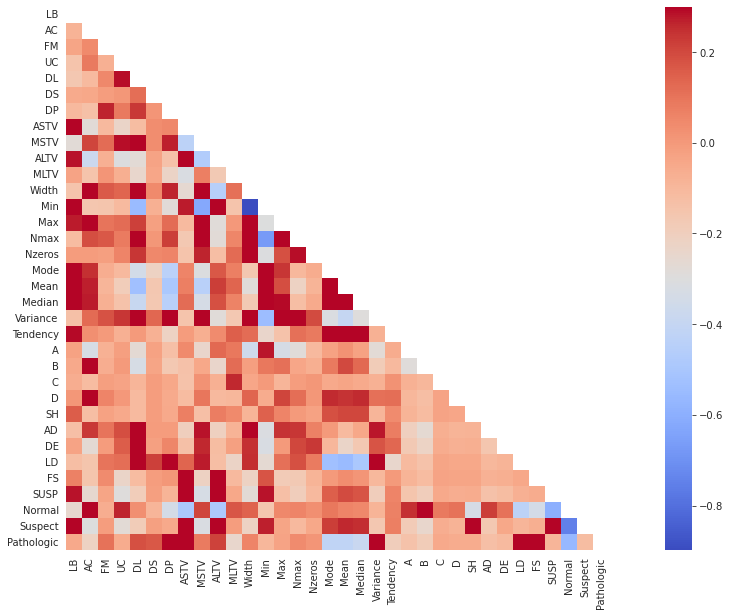

In [27]:

corr = newdata.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(20, 10))

    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm")

In [28]:
corr = np.corrcoef(CTGData['Mean'], CTGData['Median'])
print(corr)

[[1.         0.94825134]
 [0.94825134 1.        ]]


In [29]:
CTGData3=CTGData.copy()
ClassData=CTGData3.drop(labels=['NSP'],axis=1)


In [30]:
ClassData.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,9
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,6
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,6
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,6
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,2


In [31]:
ClassData1=ClassData[ClassData['CLASS']==1]
ClassData2=ClassData[ClassData['CLASS']==2]
ClassData3=ClassData[ClassData['CLASS']==3]
ClassData4=ClassData[ClassData['CLASS']==4]
ClassData5=ClassData[ClassData['CLASS']==5]
ClassData6=ClassData[ClassData['CLASS']==6]
ClassData7=ClassData[ClassData['CLASS']==7]
ClassData8=ClassData[ClassData['CLASS']==8]
ClassData9=ClassData[ClassData['CLASS']==9]
ClassData10=ClassData[ClassData['CLASS']==10]


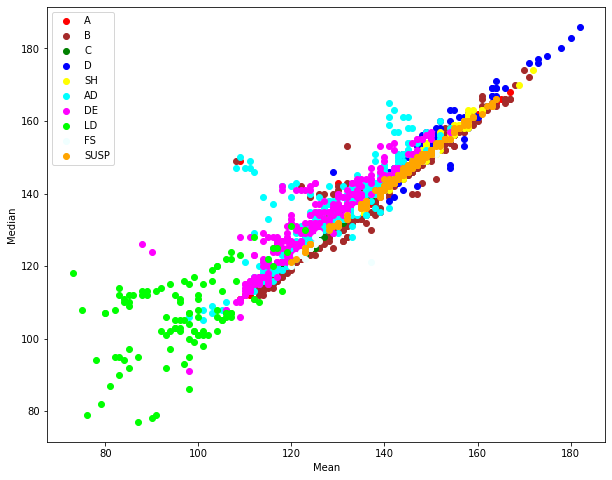

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(ClassData1['Mean'],ClassData1['Median'],c='red', label='A')
plt.scatter(ClassData2['Mean'],ClassData2['Median'],c='brown', label='B')
plt.scatter(ClassData3['Mean'],ClassData3['Median'],c='green', label='C')
plt.scatter(ClassData4['Mean'],ClassData4['Median'],c='blue', label='D')
plt.scatter(ClassData5['Mean'],ClassData5['Median'],c='yellow', label='SH')
plt.scatter(ClassData6['Mean'],ClassData6['Median'],c='cyan', label='AD')
plt.scatter(ClassData7['Mean'],ClassData7['Median'],c='magenta', label='DE')
plt.scatter(ClassData8['Mean'],ClassData8['Median'],c='lime', label='LD')
plt.scatter(ClassData9['Mean'],ClassData9['Median'],c='azure', label='FS')
plt.scatter(ClassData10['Mean'],ClassData10['Median'],c='orange', label='SUSP')
plt.xlabel('Mean')
plt.ylabel('Median')
plt.legend(loc=2)
plt.show()

In [33]:
CTGData3=CTGData.copy()
NSPData=CTGData3.drop(labels=['CLASS'],axis=1)

In [34]:
NSPData.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [35]:
NSPData1=NSPData[NSPData['NSP']==1]
NSPData2=NSPData[NSPData['NSP']==2]
NSPData3=NSPData[NSPData['NSP']==3]

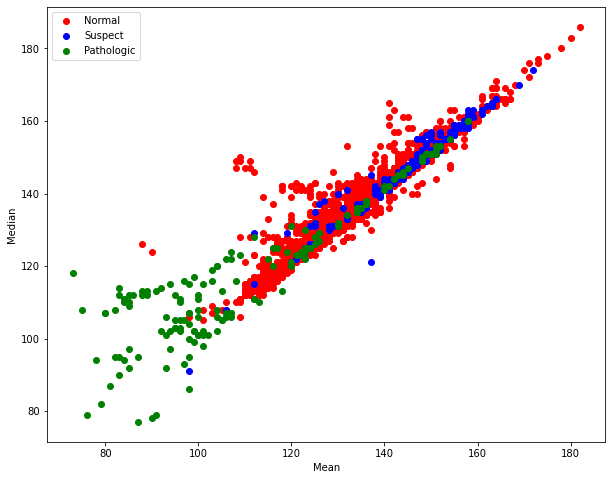

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(NSPData1['Mean'],NSPData1['Median'],c='red', label='Normal')
plt.scatter(NSPData2['Mean'],NSPData2['Median'],c='blue', label='Suspect')
plt.scatter(NSPData3['Mean'],NSPData3['Median'],c='green', label='Pathologic')
plt.xlabel('Mean')
plt.ylabel('Median')
plt.legend(loc=2)
plt.show()